# **Dhruv Karmokar**
# **21BAI1604**

## **Lab 11 - Perceptrons**

### References


- Document referred to solve the `second question` - https://github.com/Giorgos-Arg/iris-perceptron

### Q1. Implement a perceptron model to realize AND gate. Start with the weights as [0.4, 0.6]. Update the weights using perceptron learning algorithm. Print the model parameters after every epoch. Use suitable learning rate.



In [4]:
def activation(out,threshold):
    if out>=threshold:
        return 1
    else:
        return 0

def perceptron(w0,w1,lr):
    a = [0,0,1,1]
    b = [0,1,0,1]
    y = [0,0,0,1]
    w = [w0,w1]
    threshold = 1
    learning_rate = lr
    i=0
    count=0
    print("Perceptron Training : ")
    print("")
    while i<4:
        summation = a[i]*w[0] + b[i]*w[1]
        o = activation(summation,threshold)
        count=count+1
        print("Epoch : "+str(count))
        print("Input : " + str(a[i]) +" , "+ str(b[i]))
        print("Weights : " + str(w[0]) +" , "+ str(w[1]))
        print("Summation : "+str(summation) + " Threshold : "+str(threshold) )
        print("Actual Output : "+str(y[i])+" Predicated Output : "+str(o))
        if(o!=y[i]):

            print("_______\nUpdating Weights")
            w[0]=w[0]+learning_rate*(y[i]-o)*a[i]
            w[1]=w[1]+learning_rate*(y[i]-o)*b[i]
            print("Updated Weights : " + str(w[0]) +" , "+ str(w[1]))
            i = -1
            print("\nWeights Updated Training Again : ")
        i=i+1
        print("")

    print(f"Final Value of w0 is {w[0]} and of w1 is {w[1]}")
    return

# Assigning weights as per the question
w0=0.4
w1=0.6
# Let the learning rate be 0.1
lr=0.1
perceptron(w0,w1,lr)

Perceptron Training : 

Epoch : 1
Input : 0 , 0
Weights : 0.4 , 0.6
Summation : 0.0 Threshold : 1
Actual Output : 0 Predicated Output : 0

Epoch : 2
Input : 0 , 1
Weights : 0.4 , 0.6
Summation : 0.6 Threshold : 1
Actual Output : 0 Predicated Output : 0

Epoch : 3
Input : 1 , 0
Weights : 0.4 , 0.6
Summation : 0.4 Threshold : 1
Actual Output : 0 Predicated Output : 0

Epoch : 4
Input : 1 , 1
Weights : 0.4 , 0.6
Summation : 1.0 Threshold : 1
Actual Output : 1 Predicated Output : 1

Final Value of w0 is 0.4 and of w1 is 0.6


### Q2. Design a perceptron network to classify Iris plants into three species. Need to draw the network architecture and upload it along with python notebook. Implement the same with Sklearn library (MLP classifier). Fine tune the hyper parameters to get maximum accuracy.

##### Setosa vs Non-Setosa

In [21]:
import numpy as np
import pandas as pd
import random
import sys

def adjust_weights(x, weights, classes, learning_rate):
    dot_product = np.dot(x, weights[:4]) + weights[4]
    if classes[i] == 0:
        if dot_product >= 0:
            weights[:4] -= learning_rate * x
            weights[4] -= learning_rate
    else:
        if dot_product < 0:
            weights[:4] += learning_rate * x
            weights[4] += learning_rate
    return weights

def predict_class(x, weights):
    if weights.size == 5:
        dot_product = np.dot(x, weights[:4]) + weights[4]
    else:
        dot_product = np.dot(x, weights[:2]) + weights[2]
    if dot_product >= 0:
        return 1
    else:
        return 0

classification = input("Enter the class (setosa, versicolor, virginica): ")

df = pd.read_csv("/content/Iris.csv", header=None, skiprows=1)

inputs = df.iloc[0:150, [0, 1, 2, 3]].values
original_classes = np.array(df.iloc[0:150, 4].values)
classes = np.tile(np.where(original_classes == ("Iris-" + classification), 1, 0).ravel(), len(inputs))
classes_string = np.tile(np.where(original_classes == "Iris-" + classification, classification, "non-" + classification), len(inputs))

outputs = np.zeros(150)
weights = np.random.rand(5)

iterations = 0
max_iterations = 100000
convergence_count = 0
max_convergence_count = 1500

while convergence_count < max_convergence_count and iterations < max_iterations:
    i = random.randint(0, 149)
    iterations += 1
    prev_weights = np.copy(weights)
    weights = adjust_weights(x=inputs[i], weights=weights, classes=classes, learning_rate=0.01)
    if np.array_equal(weights, prev_weights):
        convergence_count += 1
    else:
        convergence_count = 0

if iterations == max_iterations:
    print("The algorithm didn't converge")
else:
    print("The algorithm converged")

print("Number of iterations:", iterations, "\n")

for i in range(0, 150):
    outputs[i] = predict_class(inputs[i], weights)

misclassified = 0
for i in range(0, 150):
    if outputs[i] == 1:
        myClass = classification
    else:
        myClass = "non-" + classification
    if myClass != classes_string[i]:
        print("Misclassified Point:", inputs[i], ". Actual class is", original_classes[i], ", but classified as", myClass)
        misclassified += 1

if misclassified == 0:
    print("All points classified correctly!\n")
else:
    print("\nTotal misclassified points:", misclassified, "\n")


Enter the class (setosa, versicolor, virginica): setosa
The algorithm converged
Number of iterations: 2329 

All points classified correctly!



<ipython-input-21-31ce33ff78da>:34: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  classes = np.tile(np.where(original_classes == ("Iris-" + classification), 1, 0).ravel(), len(inputs))
<ipython-input-21-31ce33ff78da>:35: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  classes_string = np.tile(np.where(original_classes == "Iris-" + classification, classification, "non-" + classification), len(inputs))


#### versicolor vs. non-versicolor

In [23]:
import numpy as np
import pandas as pd
import random
import sys

def adjust_weights(x, weights, classes, learning_rate):
    dot_product = np.dot(x, weights[:4]) + weights[4]
    if classes[i] == 0:
        if dot_product >= 0:
            weights[:4] -= learning_rate * x
            weights[4] -= learning_rate
    else:
        if dot_product < 0:
            weights[:4] += learning_rate * x
            weights[4] += learning_rate
    return weights

def predict_class(x, weights):
    if weights.size == 5:
        dot_product = np.dot(x, weights[:4]) + weights[4]
    else:
        dot_product = np.dot(x, weights[:2]) + weights[2]
    if dot_product >= 0:
        return 1
    else:
        return 0

classification = input("Enter the class (setosa, versicolor, virginica): ")

df = pd.read_csv("/content/Iris.csv", header=None, skiprows=1)

inputs = df.iloc[0:150, [0, 1, 2, 3]].values
original_classes = df.iloc[0:150, 4].values

classes = np.tile(np.where(original_classes == ("Iris-" + classification), 1, 0).ravel(), len(inputs))
classes_string = np.tile(np.where(original_classes == "Iris-" + classification, classification, "non-" + classification), len(inputs))

outputs = np.zeros(150)
weights = np.random.rand(5)

iterations = 0
max_iterations = 100000
convergence_count = 0
max_convergence_count = 1500

while convergence_count < max_convergence_count and iterations < max_iterations:
    i = random.randint(0, 149)
    iterations += 1
    prev_weights = np.copy(weights)
    weights = adjust_weights(x=inputs[i], weights=weights, classes=classes, learning_rate=0.01)
    if np.array_equal(weights, prev_weights):
        convergence_count += 1
    else:
        convergence_count = 0

if iterations == max_iterations:
    print("The algorithm didn't converge")
else:
    print("The algorithm converged")

print("Number of iterations:", iterations, "\n")

for i in range(0, 150):
    outputs[i] = predict_class(inputs[i], weights)

misclassified = 0
for i in range(0, 150):
    if outputs[i] == 1:
        myClass = classification
    else:
        myClass = "non-" + classification
    if myClass != classes_string[i]:
        print("Misclassified Point:", inputs[i], ". Actual class is", original_classes[i], ", but classified as", myClass)
        misclassified += 1

if misclassified == 0:
    print("All points classified correctly!\n")
else:
    print("\nTotal misclassified points:", misclassified, "\n")


Enter the class (setosa, versicolor, virginica): versicolor
The algorithm converged
Number of iterations: 2530 

All points classified correctly!



<ipython-input-23-5fed7b00a44d>:35: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  classes = np.tile(np.where(original_classes == ("Iris-" + classification), 1, 0).ravel(), len(inputs))
<ipython-input-23-5fed7b00a44d>:36: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  classes_string = np.tile(np.where(original_classes == "Iris-" + classification, classification, "non-" + classification), len(inputs))


#### virginica vs. non-virginica

In [24]:
import numpy as np
import pandas as pd
import random
import sys

def adjust_weights(x, weights, classes, learning_rate):
    dot_product = np.dot(x, weights[:4]) + weights[4]
    if classes[i] == 0:
        if dot_product >= 0:
            weights[:4] -= learning_rate * x
            weights[4] -= learning_rate
    else:
        if dot_product < 0:
            weights[:4] += learning_rate * x
            weights[4] += learning_rate
    return weights

def predict_class(x, weights):
    if weights.size == 5:
        dot_product = np.dot(x, weights[:4]) + weights[4]
    else:
        dot_product = np.dot(x, weights[:2]) + weights[2]
    if dot_product >= 0:
        return 1
    else:
        return 0

classification = input("Enter the class (setosa, versicolor, virginica): ")

df = pd.read_csv("/content/Iris.csv", header=None, skiprows=1)

inputs = df.iloc[0:150, [0, 1, 2, 3]].values
original_classes = df.iloc[0:150, 4].values

classes = np.tile(np.where(original_classes == ("Iris-" + classification), 1, 0).ravel(), len(inputs))
classes_string = np.tile(np.where(original_classes == "Iris-" + classification, classification, "non-" + classification), len(inputs))

outputs = np.zeros(150)
weights = np.random.rand(5)

iterations = 0
max_iterations = 100000
convergence_count = 0
max_convergence_count = 1500

while convergence_count < max_convergence_count and iterations < max_iterations:
    i = random.randint(0, 149)
    iterations += 1
    prev_weights = np.copy(weights)
    weights = adjust_weights(x=inputs[i], weights=weights, classes=classes, learning_rate=0.01)
    if np.array_equal(weights, prev_weights):
        convergence_count += 1
    else:
        convergence_count = 0

if iterations == max_iterations:
    print("The algorithm didn't converge")
else:
    print("The algorithm converged")

print("Number of iterations:", iterations, "\n")

for i in range(0, 150):
    outputs[i] = predict_class(inputs[i], weights)

misclassified = 0
for i in range(0, 150):
    if outputs[i] == 1:
        myClass = classification
    else:
        myClass = "non-" + classification
    if myClass != classes_string[i]:
        print("Misclassified Point:", inputs[i], ". Actual class is", original_classes[i], ", but classified as", myClass)
        misclassified += 1

if misclassified == 0:
    print("All points classified correctly!\n")
else:
    print("\nTotal misclassified points:", misclassified, "\n")


Enter the class (setosa, versicolor, virginica): virginica
The algorithm converged
Number of iterations: 2206 

All points classified correctly!



<ipython-input-24-5fed7b00a44d>:35: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  classes = np.tile(np.where(original_classes == ("Iris-" + classification), 1, 0).ravel(), len(inputs))
<ipython-input-24-5fed7b00a44d>:36: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  classes_string = np.tile(np.where(original_classes == "Iris-" + classification, classification, "non-" + classification), len(inputs))


## Building the neural network

>The setosa vs non-setosa and the virginica vs non-virginica perceptrons are used in combination with the following three output artificial neurons in order to build a neural network that outputs  (0,1,0) for setosa, (1, 0, 0) for versicolor and (0,0,1) for virginica.

1. The setosa output neuron gives 1 if the setosa perceptron gave 1. This can be implemented with the OR function, but we only want to output 1 if only the setosa input is 1, so we can set the virginica weight to 0. Thus, the following neuron can be used:

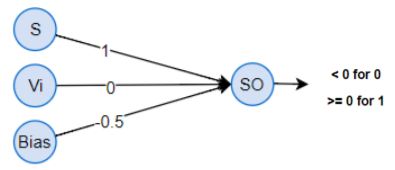

2. The versicolor output neuron gives 1 if both the setosa and virginica perceptrons gave 0. This is the NOR function. Thus, the following neuron can be used:

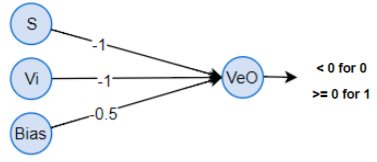

3. The virginica output neuron gives 1 if the virginica perceptron gave 1. with the same logic as the setosa neuron. Thus, the following neuron can be used:

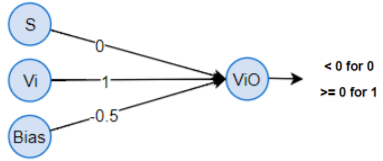

## The full network:

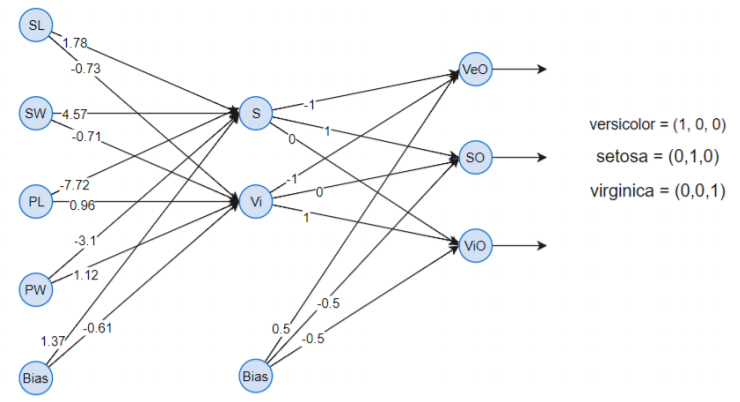


## Where:

SL = Sepal Length

SW = Sepal Width

PL = Petal Length

PW = Petal Width

S = Setosa perceptron for classifying setosa vs non-setosa

Vi = Virginica perceptron for classifying virginica vs non-virginica

VeO = Versicolor output artificial neuron that outputs 1 if the
instance is classified as versicolor

SO = Setosa output artificial neuron that outputs 1 if the instance is
classified as setosa

ViO = Virginica output artificial neuron that outputs 1 if the instance
is classified as virginica

Bias = 1

In [46]:
import numpy as np
import pandas as pd
import random

def sigmoid(x):
    # Apply sigmoid function after normalizing the input
    normalized_x = 2 * (x - np.min(x)) / np.ptp(x) - 1
    return 1 / (1 + np.exp(-normalized_x))

def adjust_weights(x, weights, classes, learning_rate):
    dot_product = np.dot(x, weights[:4]) + weights[4]
    predicted_class = sigmoid(dot_product)
    error = classes - predicted_class
    weights[:4] += learning_rate * error * x
    weights[4] += learning_rate * error
    return weights

def predict_class(x, weights):
    dot_product = np.dot(x, weights[:4]) + weights[4]
    predicted_class = sigmoid(dot_product)
    return int(predicted_class >= 0.5)

def calculate_accuracy(original_classes, setosa_outputs, virginica_outputs, versicolor_outputs):
    misclassified = 0
    for i in range(0, 150):
        if versicolor_outputs[i] == 1 and setosa_outputs[i] == 0 and virginica_outputs[i] == 0 and original_classes[i] != "Iris-versicolor":
            misclassified += 1
        elif versicolor_outputs[i] == 0 and setosa_outputs[i] == 1 and virginica_outputs[i] == 0 and original_classes[i] != "Iris-setosa":
            misclassified += 1
        elif versicolor_outputs[i] == 0 and setosa_outputs[i] == 0 and virginica_outputs[i] == 1 and original_classes[i] != "Iris-virginica":
            misclassified += 1
    if misclassified == 0:
        print("All points classified correctly!")
    else:
        print("\nTotal misclassified points:", misclassified)
    accuracy = (150 - misclassified) * 100 / 150
    print("Accuracy:", accuracy, "%\n")

def printClassification(original_classes, setosa_outputs, virginica_outputs, versicolor_outputs):
    print("Classification of the Iris dataset:\n")
    print("Data Point\tActual Class\t\tPredicted Class\t\n")
    for i in range(0, 150):
        print(i, original_classes[i], sep="\t\t", end="\t\t")
        if versicolor_outputs[i] == 1 and setosa_outputs[i] == 0 and virginica_outputs[i] == 0:
            print("Iris-versicolor")
        elif versicolor_outputs[i] == 0 and setosa_outputs[i] == 1 and virginica_outputs[i] == 0:
            print("Iris-setosa")
        elif versicolor_outputs[i] == 0 and setosa_outputs[i] == 0 and virginica_outputs[i] == 1:
            print("Iris-virginica")

df = pd.read_csv("/content/Iris.csv", header=None, skiprows=1)
inputs = df.iloc[0:150, [0, 1, 2, 3]].values
original_classes = df.iloc[0:150, 4].values

classes_setosa = np.where(original_classes == "Iris-setosa", 1, 0)
hidden_setosa_outputs = np.zeros(150)
hidden_setosa_weights = np.random.rand(5)
iterations = 0
max_iterations = 5000
convergence_count = 0
max_convergence_count = 500

while convergence_count < max_convergence_count and iterations < max_iterations:
    i = random.randint(0, 149)
    iterations += 1
    prev_hidden_setosa_weights = np.copy(hidden_setosa_weights)
    hidden_setosa_weights = adjust_weights(x=inputs[i], weights=hidden_setosa_weights, classes=classes_setosa, learning_rate=0.1)
    if np.array_equal(hidden_setosa_weights, prev_hidden_setosa_weights):
        convergence_count += 1
    else:
        convergence_count = 0

for i in range(0, 150):
    hidden_setosa_outputs[i] = predict_class(inputs[i], hidden_setosa_weights)

classes_virginica = np.where(original_classes == "Iris-virginica", 1, 0)
hidden_virginica_outputs = np.zeros(150)
hidden_virginica_weights = np.random.rand(5)
iterations = 0
max_iterations = 5000
convergence_count = 0
max_convergence_count = 500

while convergence_count < max_convergence_count and iterations < max_iterations:
    i = random.randint(0, 149)
    iterations += 1
    prev_hidden_virginica_weights = np.copy(hidden_virginica_weights)
    hidden_virginica_weights = adjust_weights(x=inputs[i], weights=hidden_virginica_weights, classes=classes_virginica, learning_rate=0.1)
    if np.array_equal(hidden_virginica_weights, prev_hidden_virginica_weights):
        convergence_count += 1
    else:
        convergence_count = 0

for i in range(0, 150):
    hidden_virginica_outputs[i] = predict_class(inputs[i], hidden_virginica_weights)

output_setosa_weights = np.array([1, 0, 1, 0, -0.5])
output_setosa_outputs = np.zeros(150)

for i in range(0, 150):
    x = np.array([hidden_setosa_outputs[i], hidden_virginica_outputs[i], 0, 0])
    output_setosa_outputs[i] = predict_class(x, output_setosa_weights)

output_virginica_weights = np.array([0, 1, 0, 1, -0.5])
output_virginica_outputs = np.zeros(150)

for i in range(0, 150):
    x = np.array([hidden_setosa_outputs[i], hidden_virginica_outputs[i], 0, 0])
    output_virginica_outputs[i] = predict_class(x, output_virginica_weights)

output_versicolor_weights = np.array([-1, -1, 0, 0, 0.5])
output_versicolor_outputs = np.zeros(150)

for i in range(0, 150):
    x = np.array([hidden_setosa_outputs[i], hidden_virginica_outputs[i], 0, 0])
    output_versicolor_outputs[i] = predict_class(x, output_versicolor_weights)

calculate_accuracy(original_classes, output_setosa_outputs, output_virginica_outputs, output_versicolor_outputs)

printClassification(original_classes, output_setosa_outputs, output_virginica_outputs, output_versicolor_outputs)


<ipython-input-46-c3efc6c5cafe>:55: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  classes_setosa = np.where(original_classes == "Iris-setosa", 1, 0)
<ipython-input-46-c3efc6c5cafe>:7: RuntimeWarning: invalid value encountered in double_scalars
  normalized_x = 2 * (x - np.min(x)) / np.ptp(x) - 1
<ipython-input-46-c3efc6c5cafe>:76: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  classes_virginica = np.where(original_classes == "Iris-virginica", 1, 0)


All points classified correctly!
Accuracy: 100.0 %

Classification of the Iris dataset:

Data Point	Actual Class		Predicted Class	

0		0.2		1		0.2		2		0.2		3		0.2		4		0.2		5		0.4		6		0.3		7		0.2		8		0.2		9		0.1		10		0.2		11		0.2		12		0.1		13		0.1		14		0.2		15		0.4		16		0.4		17		0.3		18		0.3		19		0.3		20		0.2		21		0.4		22		0.2		23		0.5		24		0.2		25		0.2		26		0.4		27		0.2		28		0.2		29		0.2		30		0.2		31		0.4		32		0.1		33		0.2		34		0.1		35		0.2		36		0.2		37		0.1		38		0.2		39		0.2		40		0.3		41		0.3		42		0.2		43		0.6		44		0.4		45		0.3		46		0.2		47		0.2		48		0.2		49		0.2		50		1.4		51		1.5		52		1.5		53		1.3		54		1.5		55		1.3		56		1.6		57		1.0		58		1.3		59		1.4		60		1.0		61		1.5		62		1.0		63		1.4		64		1.3		65		1.4		66		1.5		67		1.0		68		1.5		69		1.1		70		1.8		71		1.3		72		1.5		73		1.2		74		1.3		75		1.4		76		1.4		77		1.7		78		1.5		79		1.0		80		1.1		81		1.0		82		1.2		83		1.6		84		1.5		85		1.6		86		1.5		87		1.3		88		1.3		89		1.3		90		1.2		91		1.4		92		1.2		93		1.0		94		1.3		95		1.2		96		1.3		97		1

### Visualization

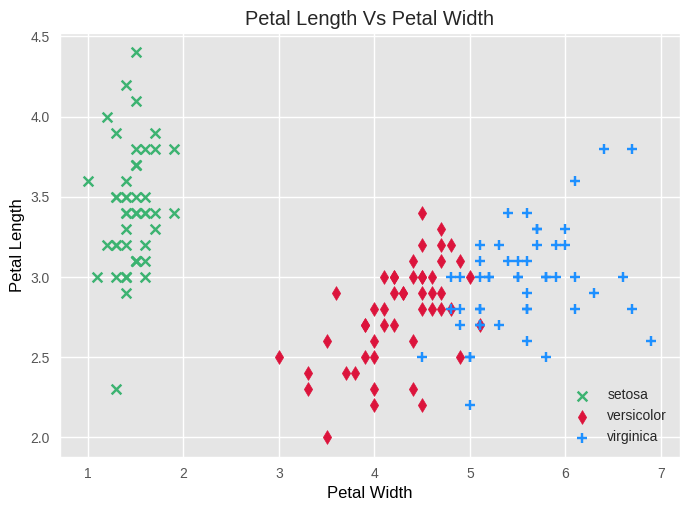

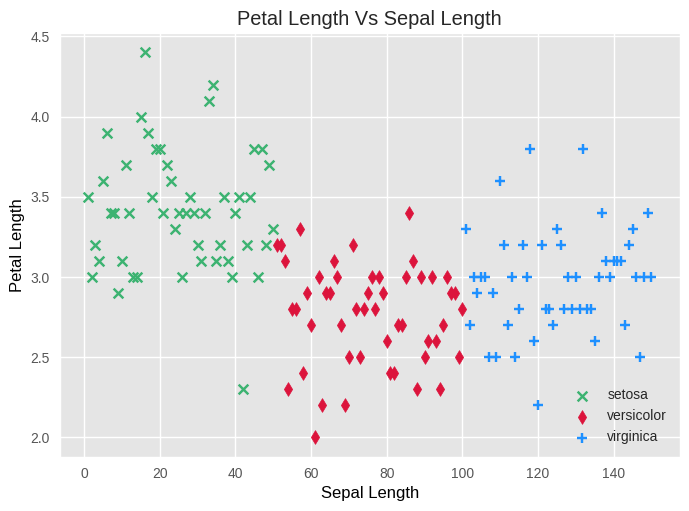

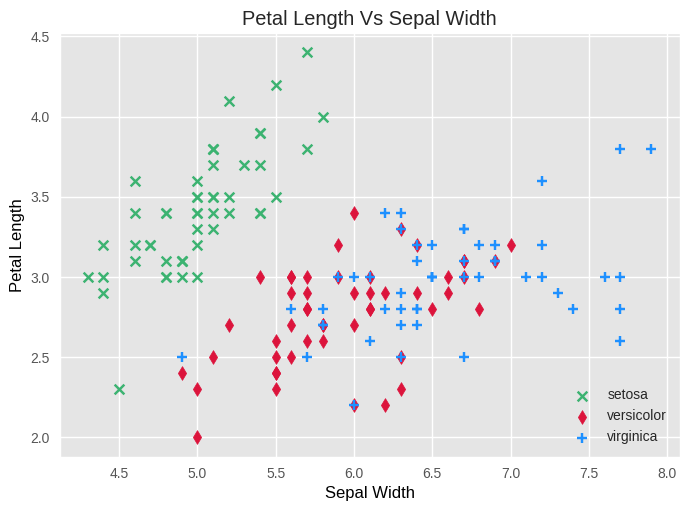

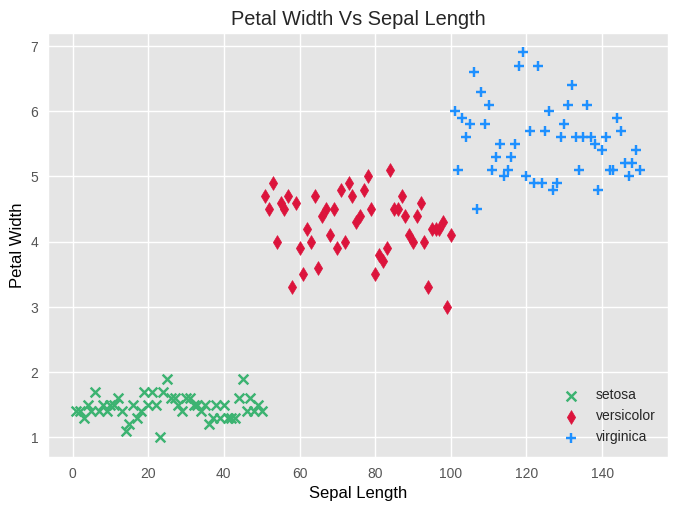

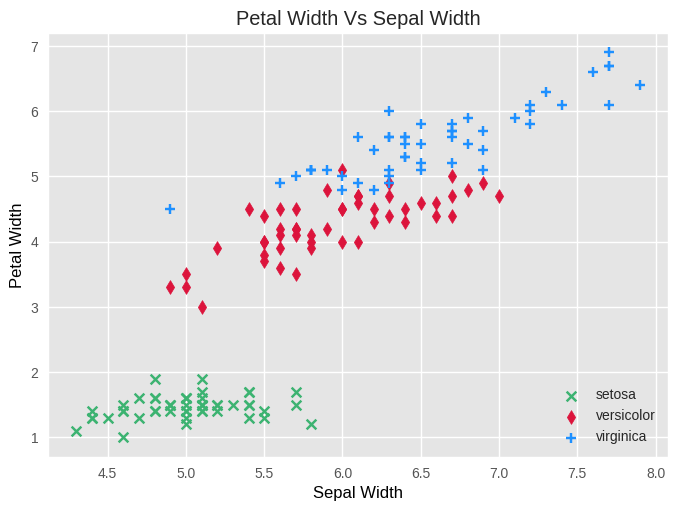

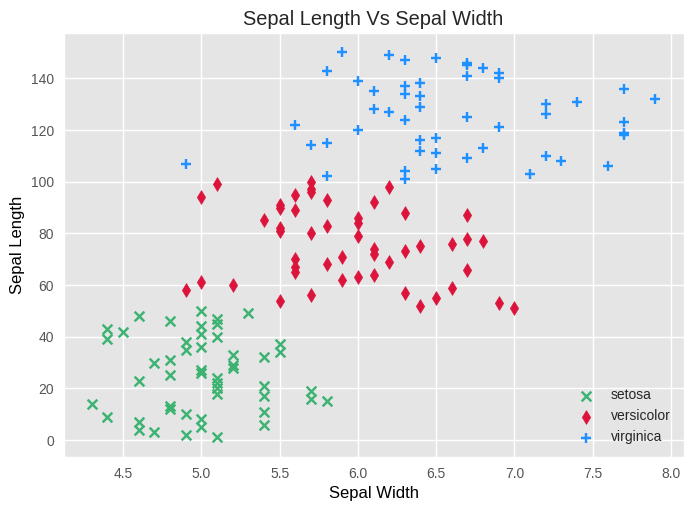

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib import style
style.use('ggplot')

%matplotlib inline

def getValues(feature, df):
    if feature == "Petal Length":
        return df.iloc[0:150, 2].values
    elif feature == "Petal Width":
        return df.iloc[0:150, 3].values
    elif feature == "Sepal Length":
        return df.iloc[0:150, 0].values
    elif feature == "Sepal Width":
        return df.iloc[0:150, 1].values


def plot(xFeature, yFeature, df):
    x = getValues(xFeature, df)
    y = getValues(yFeature, df)
    plt.figure()
    plt.scatter(x[:50], y[:50], color='mediumseagreen', marker='x', label='setosa')
    plt.scatter(x[50:100], y[50:100], color='crimson', marker='d', label='versicolor')
    plt.scatter(x[100:150], y[100:150], color='dodgerblue', marker='+', label='virginica')
    plt.title(yFeature + ' Vs ' + xFeature)
    plt.xlabel(xFeature, color='black')
    plt.ylabel(yFeature, color='black')
    plt.legend(loc='lower right')
    plt.show()


df = pd.read_csv("/content/Iris.csv", header=None, skiprows=1)

plot('Petal Width', 'Petal Length', df)
plot('Sepal Length', 'Petal Length', df)
plot('Sepal Width', 'Petal Length', df)
plot('Sepal Length', 'Petal Width', df)
plot('Sepal Width', 'Petal Width', df)
plot('Sepal Width', 'Sepal Length', df)

# Using Skit-Learn

In [35]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv("/content/Iris.csv", header=None,skiprows=1)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'logistic'],
    'learning_rate': ['constant', 'adaptive'],
}

clf = MLPClassifier(max_iter=1000, random_state=42)

grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_ * 100

print("Best Hyperparameters:")
print(best_params)
print("Accuracy:", best_accuracy)

best_clf = MLPClassifier(max_iter=1000, random_state=42, **best_params)
best_clf.fit(X_train, y_train)

y_pred = best_clf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred) * 100
print("Test Accuracy:", test_accuracy)

Best Hyperparameters:
{'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
Accuracy: 100.0
Test Accuracy: 100.0
